# Stock prediction using specified firms


## overview

This program attempts to solve the issue with gradient decent, namely that the starting values for your optimization problem determine whether you obtain a local minimum or a global minimum for your loss function. the function this program tries to optimize is the prediction of Microsoft share prices next week (5 business days) by running a multiple linear regression on Google, Apple, and NASDAQ prices today


First we need to import the neccecary libraries and look over the data

In [226]:
#import needed libraries
import numpy as np
import pandas as pd
import seaborn as sns


In [227]:
#import the csv files and display relevant info
dfM = pd.read_csv('MSFT_data.csv')
dfA = pd.read_csv('AAPL_data.csv')
dfG = pd.read_csv('GOOGL_data.csv')
dfN = pd.read_csv('NDAQ_data.csv')

dfM.info()
dfA.info()
dfG.info()
dfN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
date      1259 non-null object
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
close     1259 non-null float64
volume    1259 non-null int64
Name      1259 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 68.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
date      1259 non-null object
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
close     1259 non-null float64
volume    1259 non-null int64
Name      1259 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 68.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
date      1259 non-null object
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-nu

We can see that there are 7 columns in each data set, date, open, high, low, close, volume, and name. Each dataset has 1259 entries, and no nulls.



next we need to segregate our training and testing data to ensure the validity of our model. We also stagger the starting point of the Microsoft data with the other firms data. By having Microsoft data start 5 days in the fututre, we are training our model to make predictions on Microsoft stock five business days from now, rather than make predictions on Microsoft stock today.

In [239]:
#segregate training and testing data as well as stagger data so im using past data to predict future stock
trainM = dfM[5:880]
testM  = dfM[880:1259]
trainA = dfA[0:875]  
testA  = dfA[875:1254]
trainG = dfG[0:875]  
testG  = dfG[875:1254]
trainN = dfN[0:875]  
testN  = dfN[875:1254]


As you can see below, the Microsoft data starts one week after the other firms data sets. We also check the lengths of all the data sets to make sure they are all the same length and that we made no mistake when staggering the data above.

In [240]:
#print out first few rows of each set to make sure date of explanitory variables are staggered 5 business day behind,

print(trainM.head(6))
print(trainA.head(6))
print(trainG.head(6))
print(trainN.head(6))

print(); print() #gives some space between two outputs

#and all data frames are the same length
print(len(trainM))
print(len(trainA))
print(len(trainG))
print(len(trainN))
            

          date     open   high     low   close    volume  Name
5   2013-02-15  28.0400  28.16  27.875  28.010  49650538  MSFT
6   2013-02-19  27.8801  28.09  27.800  28.045  38804616  MSFT
7   2013-02-20  28.1300  28.20  27.830  27.870  44109412  MSFT
8   2013-02-21  27.7400  27.74  27.230  27.490  49078338  MSFT
9   2013-02-22  27.6800  27.76  27.480  27.760  31425726  MSFT
10  2013-02-25  27.9700  28.05  27.370  27.370  48011248  MSFT
         date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL
5  2013-02-15  66.9785  67.1656  65.7028  65.7371   97924631  AAPL
         date      open      high       low     close   volume   Name
0  2013-02-08  390.4

We then graph the data out to see how strong the relationship between each firms stock price is with Microsofts stock price. This also makes sure that the two variables share a linear relationship and not an exponential one.

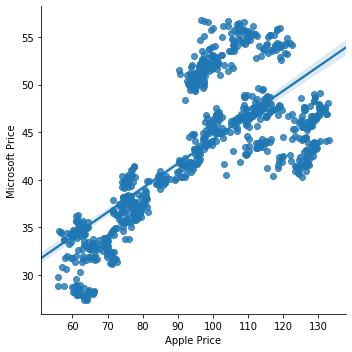

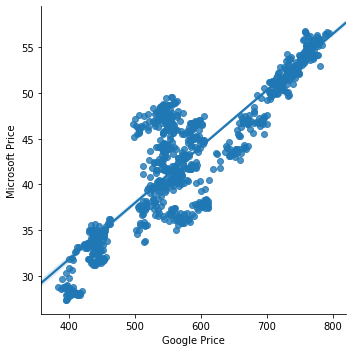

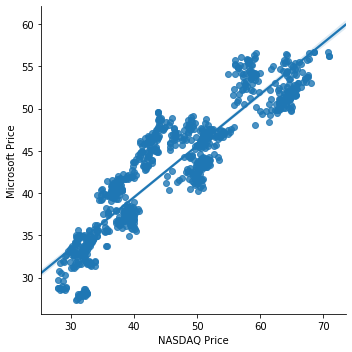

In [241]:
#graph out relationships between price of company x the day before, relative to microsoft shares
sns.lmplot('Apple Price', 'Microsoft Price', pd.DataFrame({'Apple Price':trainA.close, 'Microsoft Price':trainM.close}))
sns.lmplot('Google Price', 'Microsoft Price', pd.DataFrame({'Google Price':trainG.close, 'Microsoft Price':trainM.close}))
sns.lmplot('NASDAQ Price', 'Microsoft Price', pd.DataFrame({'NASDAQ Price':trainN.close, 'Microsoft Price':trainM.close}))


All three explanitory variables have a strong relationship with Microsoft share prices and have a linear corrrelation.

Now that we know these three variables are a good place to start, we create a function called gradient_decent, which will take in an intercept, three data sets, the starting values for the betas of each data set, how many variables are active (0 is just the intercept, 1 is intercept and first variable, etc.), the number of iterations, the learning rate, and the decay rate.

In [415]:
t#create a function to run gradient decent and find optimized weights


def gradient_decent(beta0_start,var1,var1_start,var2,var2_start,var3,var3_start,active_var,iteration,alpha,e):
    
    #size of training data
    N = len(trainM.close)

    #set iterations and lerning rate
    iterations = iteration
    learning_rate = alpha
    
    
    #set the starting value for each beta
    beta_3 = var3_start
    beta_2 = var2_start
    beta_1 = var1_start
    beta_0 = beta0_start
    
    for each_element in range (iterations):
        #set beta derivations to 0 for new iteration
        beta_0_deriv = 0
        beta_1_deriv = 0
        beta_2_deriv = 0
        beta_3_deriv = 0
        
        #calculate the partial derivatives
        for i in range(N):
            #loss function is (actual value - predicted value)**2
            
            #error is the second half of what you get when you take the derivative of the loss funciton
            error = (trainM.close[i+5] - (beta_3*var3[i] + beta_2*var2[i] + beta_1*var1[i] + beta_0))
            
            #since the second half of the derivative of the loss function is the same for all var's regardless
            # of what variable you are deriving with respect to, you just need to write the first half of the derivation 
            beta_3_deriv += -2*var3[i] * error
            
            beta_2_deriv += -2*var2[i] * error
            
            beta_1_deriv += -2*var1[i] * error
            
            beta_0_deriv += -2*error
            
        
        #measure the total error to gauge how accurate the model is
        total_error = 0.0
        for i in range(N):
            error = (trainM.close[i+5] - (beta_3*var3[i] + beta_2*var2[i] + beta_1*var1[i] + beta_0))
            total_error  += error**2
            
        
       
        #updates betas
        temp = beta_3_deriv/N
        beta_3 -= temp* learning_rate
        temp = beta_2_deriv/N
        beta_2 -= temp* learning_rate
        temp = beta_1_deriv/N
        beta_1 -= temp* learning_rate 
        temp = beta_0_deriv/N
        beta_0 -= temp* learning_rate
        
        
        #3 if statements to determine which variables are improved depending on what the user chose for active vars
        if active_var <3 :
            beta_3 = 0
        if active_var <2 :
            beta_2 = 0
        if active_var <1 :
            beta_1 = 0
        

        

        #prints out information every 25 iterations for the user to see what is going on
        if (each_element% 25 ==0):
             print ('iteration:',each_element,'       Beta 3:', round(beta_3,5),'        Beta 2:', round(beta_2,5),'  Beta 1:',round(beta_1,5)
                    ,'     Beta 0:',round(beta_0,5)
                    ,'     Total Error:',round(total_error,10),'    alpha:',learning_rate)
        
        
        
            #keeps track of the starting and final betas and total error
        if ((each_element+1)%iteration == 0 and each_element>0):
            error_history.append(total_error)
            beta0_history.append(beta0_start)
            var1_history.append(var1_start)
            var2_history.append(var2_start)
            var3_history.append(var3_start)
            beta0_final.append(beta_0)
            var1_final.append(beta_1)
            var2_final.append(beta_2)
            var3_final.append(beta_3)
            
        #decrease the learning rate based on what epsilon is and what the total error is. As you get closer to the
        # minimum, the total error decreases and you will start taking smaller steps
        learning_rate -= e/total_error 
                
                
    #prints final values            
    print('beta 0:', beta_0)
    print('beta 1:', beta_1)
    print('beta 2:', beta_2)
    print('beta 3:', beta_3)
    print('Total Error:',total_error)
        
    
    
    return;

    

Next we try using the gradient decent function to make sure it works and to check if the function is properly holding the values in its history

In [425]:
#reset history
error_history   = []
beta0_history   = []
var1_history    = []
var2_history    = []
var3_history    = []

#runs gradient decent for each varible indipendintly, starting values are all 0, 100 iterations each 
gradient_decent(0,trainA.close,0,trainG.close,0,trainN.close,0,1,100,0.000008,.00002)
print('Apple only')
print();print()

gradient_decent(0,trainG.close,0,trainN.close,0,trainA.close,0,1,100,0.0000001, .000002)
print('Google only')
print();print()


gradient_decent(0,trainN.close,0,trainA.close,0,trainG.close,0,1,100,0.000008,.00002)
print('NASDAQ only')
print();print()


iteration: 0        Beta 3: 0         Beta 2: 0   Beta 1: 0.06739      Beta 0: 0.00069      Total Error: 1674159.38673025     alpha: 8e-06
iteration: 25        Beta 3: 0         Beta 2: 0   Beta 1: 0.43763      Beta 0: 0.00477      Total Error: 38972.9529103281     alpha: 7.993201159942278e-06
iteration: 50        Beta 3: 0         Beta 2: 0   Beta 1: 0.44367      Beta 0: 0.0052      Total Error: 38537.7847826582     alpha: 7.980247682143795e-06
iteration: 75        Beta 3: 0         Beta 2: 0   Beta 1: 0.44376      Beta 0: 0.00557      Total Error: 38537.0627367188     alpha: 7.967273270844248e-06
beta 0: 0.005927872636784656
beta 1: 0.4437606280177882
beta 2: 0
beta 3: 0
Total Error: 38536.482740512474
Apple only


iteration: 0        Beta 3: 0         Beta 2: 0   Beta 1: 0.00515      Beta 0: 1e-05      Total Error: 1674159.38673025     alpha: 1e-07
iteration: 25        Beta 3: 0         Beta 2: 0   Beta 1: 0.06251      Beta 0: 0.00011      Total Error: 57135.2804649645     alpha: 9.

In [426]:
print(error_history)
print(beta0_history)
print(var1_history)
print(var2_history)
print(var3_history)

[38536.482740512474, 12373.551626715864, 21932.403789198863]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]
[0, 0, 0]


Now that we are sure our function works, we will reset history, and use a for loop to run gradient decent a set number of times each time with random values for the starting betas.

Afterwards we can look at which starting set of values gave us the best results, and we can work with those starting values.

the more guesses you make the more likely you are to find the optimal value, but you need to make sure to set a high enough iteration as well. If you choose a small number of iterations you may end up with a guess that starts very close to a local minimum, whereas another guess might have led the global minimum, but simply did not have enough time.

In [416]:
#reset history
error_history   = []
beta0_history   = []
var1_history    = []
var2_history    = []
var3_history    = []
beta0_final     = []
var1_final      = []
var2_final      = []
var3_final      = []

#number of guesses program will take
epochs = 50
#the range of random numbers guessed, i.e. var range of 5 will give random values between -5 to 5
var_range = 5

#roughly 7 seconds for 1 epoch of 100 iterations
for each_epoch in range (epochs):
    print('epoch:',each_epoch)
    print()
    gradient_decent((np.random.rand()*var_range),trainG.close,(np.random.rand()*var_range),
                    trainA.close,(np.random.rand()*var_range),trainN.close,(np.random.rand()*var_range),
                    2,100,0.000002,.00002)
    print();print()

        
        
print()

print(error_history)
print(beta0_history)
print(var1_history)
print(var2_history)
print(var3_history)

epoch: 0

iteration: 0        Beta 3: 0         Beta 2: 3.07351   Beta 1: -2.25617      Beta 0: 2.8865      Total Error: 4908021631.994717     alpha: 2e-06
iteration: 25        Beta 3: 0         Beta 2: 3.25025   Beta 1: -0.45733      Beta 0: 2.88916      Total Error: 3091960.7435905337     alpha: 1.999873891228141e-06
iteration: 50        Beta 3: 0         Beta 2: 3.14248   Beta 1: -0.43988      Beta 0: 2.88887      Total Error: 2882899.2044876153     alpha: 1.9997066207323137e-06
iteration: 75        Beta 3: 0         Beta 2: 3.03844   Beta 1: -0.42303      Beta 0: 2.88858      Total Error: 2688019.3833070225     alpha: 1.9995272216237102e-06
beta 0: 2.8883189065807295
beta 1: -0.4074020526978685
beta 2: 2.9419364415897555
beta 3: 0
Total Error: 2513383.299869052


epoch: 1

iteration: 0        Beta 3: 0         Beta 2: 2.85688   Beta 1: -2.86208      Beta 0: 1.62863      Total Error: 7115532425.164703     alpha: 2e-06
iteration: 25        Beta 3: 0         Beta 2: 3.13919   Beta 1: 

iteration: 75        Beta 3: 0         Beta 2: 3.11939   Beta 1: -0.43182      Beta 0: 0.29487      Total Error: 2824880.7745609903     alpha: 1.9995521015983425e-06
beta 0: 0.2946083431780996
beta 1: -0.4158004729059831
beta 2: 3.0204617946553998
beta 3: 0
Total Error: 2641346.976924313


epoch: 11

iteration: 0        Beta 3: 0         Beta 2: 1.81517   Beta 1: -2.04392      Beta 0: 0.80422      Total Error: 4594779791.848187     alpha: 2e-06
iteration: 25        Beta 3: 0         Beta 2: 2.03474   Beta 1: -0.25703      Beta 0: 0.807      Total Error: 1151885.973343556     alpha: 1.999671070546623e-06
iteration: 50        Beta 3: 0         Beta 2: 1.9691   Beta 1: -0.2464      Beta 0: 0.80683      Total Error: 1074304.2666538926     alpha: 1.9992221335127247e-06
iteration: 75        Beta 3: 0         Beta 2: 1.90573   Beta 1: -0.23614      Beta 0: 0.80666      Total Error: 1001994.651021545     alpha: 1.9987407869432364e-06
beta 0: 0.8065090722597854
beta 1: -0.22662482108210596
beta

iteration: 25        Beta 3: 0         Beta 2: 2.63345   Beta 1: -0.35691      Beta 0: 2.5676      Total Error: 1993072.008136286     alpha: 1.999794331868744e-06
iteration: 50        Beta 3: 0         Beta 2: 2.54698   Beta 1: -0.34291      Beta 0: 2.56737      Total Error: 1858477.1292790272     alpha: 1.999534847122106e-06
iteration: 75        Beta 3: 0         Beta 2: 2.46351   Beta 1: -0.32939      Beta 0: 2.56714      Total Error: 1733017.751004824     alpha: 1.9992565734917666e-06
beta 0: 2.5669276231235685
beta 1: -0.3168566604767175
beta 2: 2.386087029829347
beta 3: 0
Total Error: 1620595.451094736


epoch: 22

iteration: 0        Beta 3: 0         Beta 2: 3.35856   Beta 1: -1.16012      Beta 0: 0.34965      Total Error: 409154335.66783965     alpha: 2e-06
iteration: 25        Beta 3: 0         Beta 2: 3.35236   Beta 1: -0.46964      Beta 0: 0.35046      Total Error: 3281822.27193554     alpha: 1.9998742826478296e-06
iteration: 50        Beta 3: 0         Beta 2: 3.24133   Bet

beta 0: 0.9868221972733127
beta 1: -0.020937183002659322
beta 2: 0.5749113542410964
beta 3: 0
Total Error: 69271.05822145924


epoch: 32

iteration: 0        Beta 3: 0         Beta 2: -0.98632   Beta 1: -1.99921      Beta 0: 0.74202      Total Error: 7439874719.559605     alpha: 2e-06
iteration: 25        Beta 3: 0         Beta 2: -0.60785   Beta 1: 0.17099      Beta 0: 0.74573      Total Error: 178746.9395860616     alpha: 1.9980222550543585e-06
iteration: 50        Beta 3: 0         Beta 2: -0.58244   Beta 1: 0.16688      Beta 0: 0.7458      Total Error: 167108.0707312328     alpha: 1.9951325121066554e-06
iteration: 75        Beta 3: 0         Beta 2: -0.55795   Beta 1: 0.16291      Beta 0: 0.74588      Total Error: 156272.295369875     alpha: 1.9920419321029084e-06
beta 0: 0.7459515196418374
beta 1: 0.15923682906417794
beta 2: -0.5352574618792659
beta 3: 0
Total Error: 146574.00717715372


epoch: 33

iteration: 0        Beta 3: 0         Beta 2: 2.05778   Beta 1: -1.44866      Beta 

iteration: 50        Beta 3: 0         Beta 2: 2.11214   Beta 1: -0.27421      Beta 0: 3.5953      Total Error: 1256957.3407860918     alpha: 1.9993343530530104e-06
iteration: 75        Beta 3: 0         Beta 2: 2.04355   Beta 1: -0.2631      Beta 0: 3.59511      Total Error: 1172256.468769515     alpha: 1.998922936415167e-06
beta 0: 3.5949392381570284
beta 1: -0.2528004255263508
beta 2: 1.9799474254496423
beta 3: 0
Total Error: 1096361.5301199772


epoch: 43

iteration: 0        Beta 3: 0         Beta 2: 3.35455   Beta 1: -1.58088      Beta 0: 3.89218      Total Error: 1855027305.1549625     alpha: 2e-06
iteration: 25        Beta 3: 0         Beta 2: 3.41143   Beta 1: -0.4851      Beta 0: 3.89365      Total Error: 3424461.368201414     alpha: 1.999882493543214e-06
iteration: 50        Beta 3: 0         Beta 2: 3.298   Beta 1: -0.46673      Beta 0: 3.89333      Total Error: 3192867.976194294     alpha: 1.9997314631726456e-06
iteration: 75        Beta 3: 0         Beta 2: 3.18849   Beta

Now that we have all of our guesses, we need to find which guess had the best starting values. We will create a new array that will take in all the values of the error_history array in the order in which they appreared. Then we will use the .sort() function on our error_history list to find the smallest value in the list.

In [417]:
unsorted_errors = []
for i in range (len(error_history)):
    unsorted_errors.append(error_history[i])

print(unsorted_errors)
    

[2513383.299869052, 2332800.750993732, 1810561.2857590916, 31003.944555984715, 3129914.5833239863, 938743.9101470289, 436904.8453031774, 5143550.515844795, 1134774.9736597647, 49238.29828957922, 2641346.976924313, 937204.607588747, 2535128.305866879, 2575028.7816471076, 4968498.021383163, 4727340.74746463, 1330727.0700390826, 23212.0048598243, 593834.342119853, 1977272.0442429667, 1894197.8180115777, 1620595.451094736, 2667688.5664331494, 373361.99623272056, 402129.17561087274, 376255.3516515658, 1139279.1284337686, 1081405.0032043536, 4412148.4487087345, 452418.8576784363, 8525.09419543159, 69271.05822145924, 146574.00717715372, 1081447.5573353535, 825292.6735628655, 3724589.73979635, 47945.54275022624, 36935.85988430826, 212935.74038207432, 183460.8344349625, 1298459.7085068305, 1484460.5687574036, 1096361.5301199772, 2783522.542860038, 1690394.141076333, 562995.3741724087, 3360863.983506789, 933605.2306634022, 842482.2143184713, 3302516.3900148333]


We now go through the unsorted list, checking each item until we find an exact match for the lowest total error. Once a match is found the program will print the best betas, the total error, and which epoch these values belong to. Finally we set the final betas to the best starting guesses to be used for later.

In [418]:
error_history.sort()

for i in range (len(error_history)):
    if(unsorted_errors[i]==error_history[0]):
        print('best set of starting variables:')
        print('beta0:',beta0_history[i])
        print('beta1:',var1_history[i])
        print('beta2:',var2_history[i])
        print('beta3:',var3_history[i])
        print('total error:',error_history[i])
        print('epoch:',i)
        
        finalB0 = beta0_history[i]
        finalB1 = var1_history[i]
        finalB2 = var2_history[i]
        finalB3 = var3_history[i]

best set of starting variables:
beta0: 0.9218633913139906
beta1: 1.804930019548114
beta2: 0.5037135607820431
beta3: 2.8802284888505545
total error: 1620595.451094736
epoch: 30


Now that we have a good set of starting values, we can run a gradient decent for a large number of iterations using the optimal starting values.

In [421]:
gradient_decent(finalB0,trainG.close,finalB1,
                   trainA.close,finalB2,trainN.close,finalB3,
                   2,1000,0.000002,.000002)

iteration: 0        Beta 3: 0         Beta 2: 0.04174   Beta 1: -1.04475      Beta 0: 0.91712      Total Error: 1273224711.8504288     alpha: 2e-06
iteration: 25        Beta 3: 0         Beta 2: 0.21393   Beta 1: 0.03763      Beta 0: 0.91892      Total Error: 8920.1019871272     alpha: 1.996176926577084e-06
iteration: 50        Beta 3: 0         Beta 2: 0.21104   Beta 1: 0.0381      Beta 0: 0.91892      Total Error: 8769.2808548971     alpha: 1.990525025066062e-06
iteration: 75        Beta 3: 0         Beta 2: 0.20826   Beta 1: 0.03855      Beta 0: 0.91892      Total Error: 8629.0360175824     alpha: 1.9847785111483804e-06
iteration: 100        Beta 3: 0         Beta 2: 0.20558   Beta 1: 0.03898      Beta 0: 0.91893      Total Error: 8498.6066939831     alpha: 1.978941125143023e-06
iteration: 125        Beta 3: 0         Beta 2: 0.203   Beta 1: 0.0394      Beta 0: 0.91893      Total Error: 8377.2875646482     alpha: 1.9730166021515154e-06
iteration: 150        Beta 3: 0         Beta 2:

We are now done with the training, and can test our data against the testing data sets we set aside at the beggining of the program.

We can also print out a few fields like sample size and standard deviation.

In [424]:
#testing to see if variable adds or removes from accuracy
N = len(testM.close)
beta_3 =var3_final[-1]             
beta_2= var2_final[-1]
beta_1= var1_final[-1]      
beta_0= beta0_final[-1]
total_error = 0

for i in range(N):
    total_error  += (testM.close[i+880] - (beta_1*testG.close[i+875] +beta_2*testA.close[i+875] + beta_3*testN.close[i+875] + beta_0))**2
        
print('total error:',total_error)
print('sample size:',N)
print('Standard Deviation:',(total_error/N)**.5)

total error: 9461.257283279623
sample size: 379
Standard Deviation: 4.9963726375961315
